In [121]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams

rcParams['figure.figsize'] = 15, 7

%matplotlib inline

In [34]:
M = 3
C = 4.468

def rating_t(avg_rating, votes):
    return (avg_rating * votes + M * C) / (M + votes)

def rating_v(rates):
    return (np.mean(rates) * len(rates)+ M * C) / (M + len(rates))

## How rating changes with the number of votes

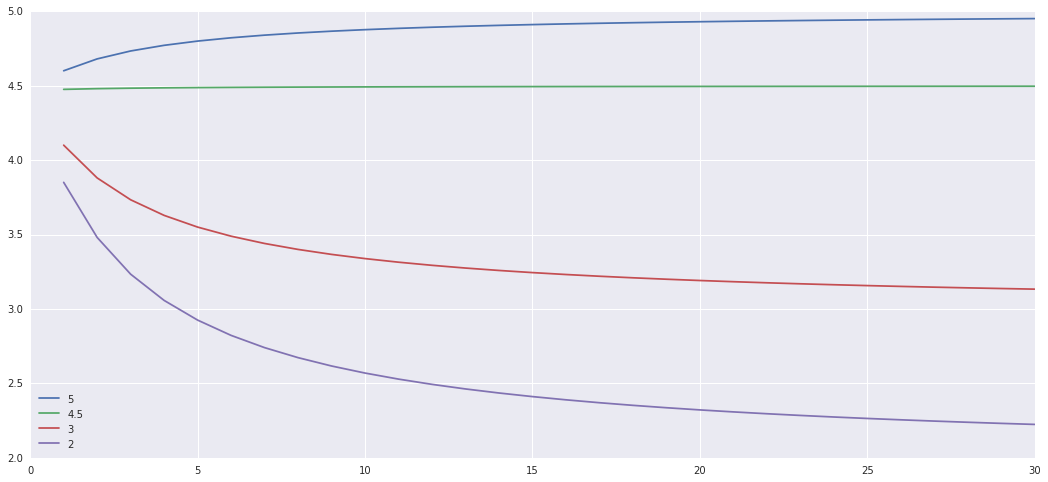

In [211]:
plt.figure(figsize=(18, 8))

max_votes = 31

for r in [5, 4.5, 3, 2]:
    plt.plot(range(1, max_votes), [rating_t(r, v) for v in range(1, max_votes)])
    
plt.legend([5, 4.5, 3, 2], loc=3)

Basically, with additional votes the final rating asymptotically aproaches arithmetic mean. Bayesian correction mostly affects tabs with lower ratings. Note that it has almost no effect when aythmetic mean is close to the arythmetic mean of the whole distribution (4.5).

# Distribution of ratings

In [142]:
import sqlalchemy, pyodbc
import pandas as pd, numpy as np
from sqlalchemy.sql import text

import pylab
from scipy.stats import norm

In [90]:
u_conn = sqlalchemy.create_engine('mysql+pyodbc://replica_lan_u_guitarcom').connect()

In [156]:
ratings = pd.read_sql('select rating, rowid from tabs_rate where type=3 AND date >= \'2015-01-01\'', u_conn)

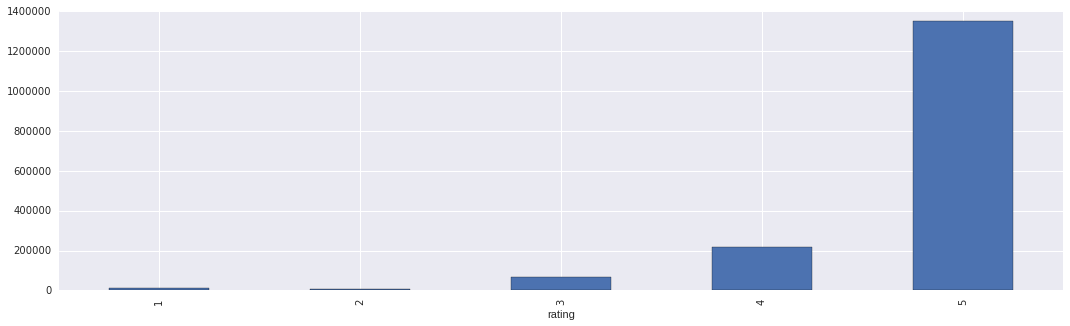

In [159]:
plt.figure(figsize=(18, 5))
ratings.groupby('rating').rating.count().plot(kind='bar')

### Distribution of individual rates is certanly non-normal and not-simetrical.

In [162]:
tabs = ratings.groupby('rowid').rating.agg({'avg_rating': np.mean, 'votes': len})

In [179]:
tabs30 = tabs[tabs.votes > 30].copy()

In [180]:
tabs100 = tabs[tabs.votes > 100].copy()

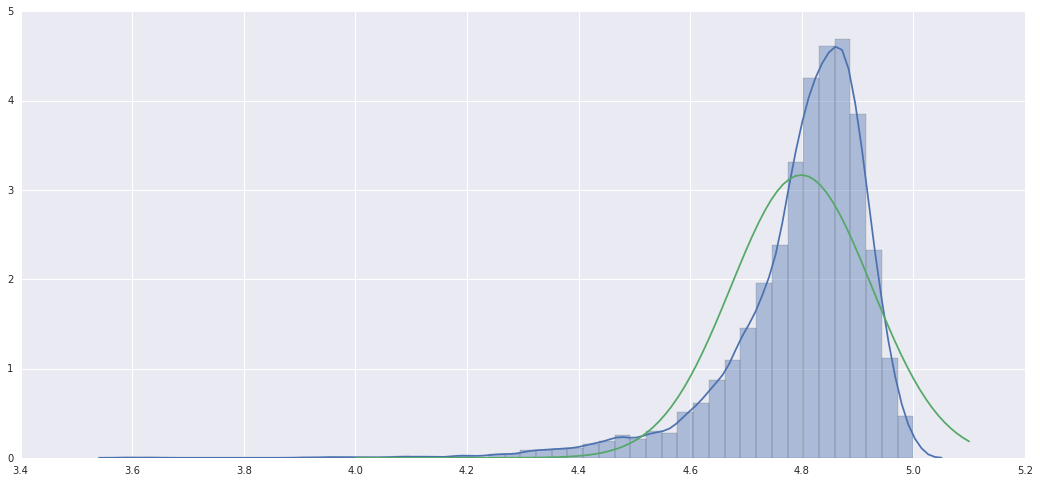

In [181]:
plt.figure(figsize=(18, 8))
sns.distplot(tabs30.avg_rating.values)

x = np.linspace(4,5.1,100)
y = norm.pdf(x, loc=np.mean(tabs30.avg_rating.values), scale=np.std(tabs30.avg_rating.values))    # for example
pylab.plot(x,y)
pylab.show()

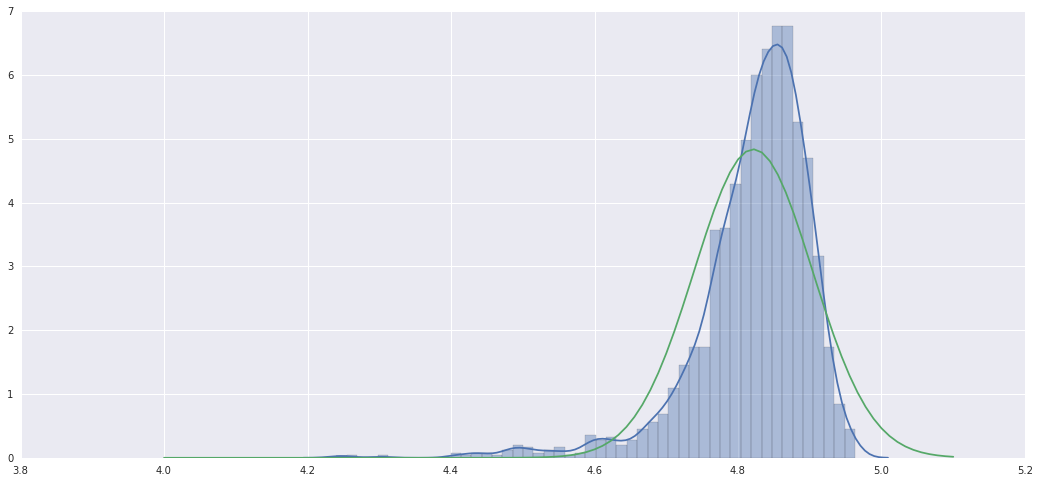

In [182]:
plt.figure(figsize=(18, 8))
sns.distplot(tabs100.avg_rating.values)

x = np.linspace(4,5.1,100)
y = norm.pdf(x, loc=np.mean(tabs100.avg_rating.values), scale=np.std(tabs100.avg_rating.values))    # for example
pylab.plot(x,y)
pylab.show()

### Yet, in accordance with the CLT the distribution of means for individual tabs converges to normal with the grows of votes.

In [198]:
conf_int = np.array([-2,2]) * tabs30.avg_rating.std() + tabs30.avg_rating.mean()

tabs30[np.logical_and(tabs30.avg_rating > conf_int[0], tabs30.avg_rating < conf_int[1])].count() / tabs30.count()

avg_rating    0.952732
votes         0.952732
dtype: float64

### 95% of the values lie closer then 2 std from the mean